In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Problem : Principal Component Analysis
**Principal component analysis** (PCA) is a technique of dimensionality reduction, which linearly maps data onto a lower-dimensional space, so that the variance of the projected data in the associated dimensions would be maximized. In this problem, you will perform PCA on a dataset of face images.

In [26]:
X_train, X_test = [],[]
Y_train, Y_test = [],[]
for i in range(1,41):
    for j in range(1,10):
        img = cv2.imread('data/{}_{}.png'.format(i,j), cv2.IMREAD_GRAYSCALE)
        X_train.append(img)
        Y_train.append(i)
    img = cv2.imread('data/{}_10.png'.format(i),cv2.IMREAD_GRAYSCALE)
    X_test.append(img)
    Y_test.append(i)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(X_train)
Y_test = np.array(X_test)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(360, 56, 46) (360, 56, 46)
(40, 56, 46) (40, 56, 46)


In [27]:
x = X_train.reshape(len(Y_train), -1)
print(x.shape)

(360, 2576)


## 1. mean face & first four eigenfaces

<function matplotlib.pyplot.show(close=None, block=None)>

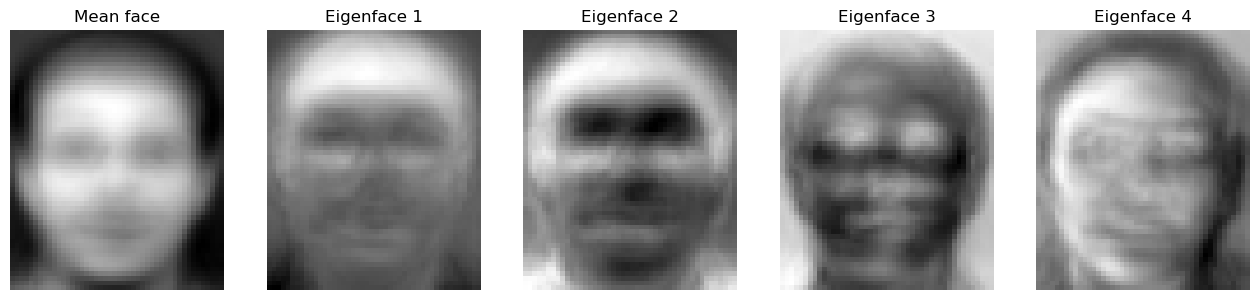

In [28]:
pca = PCA()
pca.fit(X_train.reshape(len(Y_train), -1))

plt.figure(figsize=(16,12))
plt.subplot(1,5,1)
plt.axis('off')
plt.title("Mean face")
plt.imshow(pca.mean_.reshape(X_train[0].shape),cmap = 'gray')

for i in range(4):
    plt.subplot(1,5,i+2)
    plt.axis('off')
    plt.title("Eigenface {}".format(i+1))
    plt.imshow(pca.components_[i].reshape(X_train[0].shape),cmap = 'gray')
    
plt.show

## 2. Reconstruct person2 image1 using the first n = 3, 50, 170, 240, 345 eigenfaces
## 3. compute the mean squared error

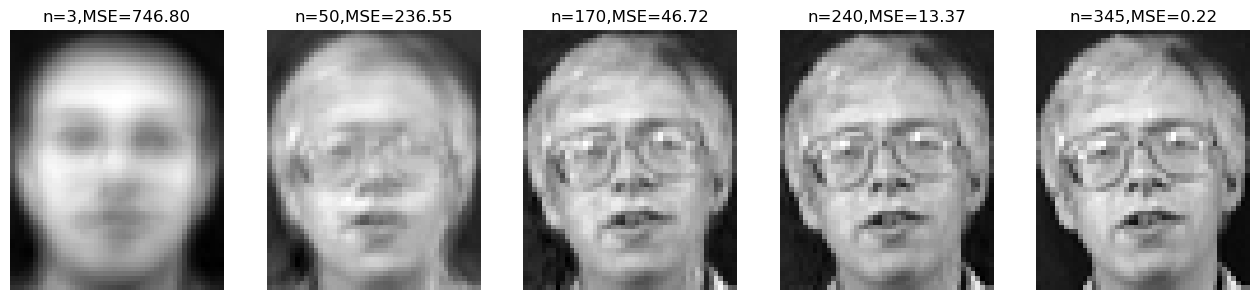

In [29]:
img = cv2.imread('data/2_1.png',cv2.IMREAD_GRAYSCALE).reshape(1,-1)
a = pca.transform(img)

plt.figure(figsize=(16,12))
n_components = [3,50,170,240,345]
for i,n in enumerate(n_components):
    face = np.zeros(img.shape)
    for j in range(n):
        face = face + a[0][j]*pca.components_[j]
    face = face +pca.mean_
    MSE = np.mean((face-img)**2)
    plt.subplot(1,5,i+1)
    plt.axis('off')
    plt.title("n={},MSE={:.2f}".format(n,MSE))
    plt.imshow(face.reshape(X_train[0].shape),cmap = 'gray')

## 4. cross-validation results

In [30]:
reduced_X_train = pca.transform(X_train.reshape(len(Y_train),-1))
K = [1,3,5]
N = [3,50,170]
random = np.random.permutation(len(Y_train))
reduced_X_train = reduced_X_train[random]
Y_train_random = Y_train[random]
for k in K:
    print("k={}".format(k))
    knn = KNeighborsClassifier(n_neighbors=k)
    for n in N:
        print('   n={},'.format(n), end='')
        score = cross_val_score(knn, reduced_X_train[:, :n], Y_train_random, cv=3)
        print('score={:.4f}'.format(score.mean()))

k=1
   n=3,

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_base.py", line 454, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1122, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1132, in _check_y
    y = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    raise ValueError(
ValueError: Found array with dim 3. KNeighborsClassifier expected <= 2.


## 5. recognition rate of the testing set

In [32]:
k = 1
n = 50

reduced_X_test = pca.transform(X_test.reshape(len(Y_test), -1))

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(reduced_X_train[:, :n], Y_train_random)

print('accuracy = {}'.format(knn.score(reduced_X_test[:, :n], Y_test)))

ValueError: Found array with dim 3. KNeighborsClassifier expected <= 2.